### Importing the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

### Importing the dataset

In [3]:
dataset = pd.read_csv('heart.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Dataset description

In [4]:
print('Rows:', len(dataset))
dataset.describe()

Rows: 303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Splitting the dataset into the dependent and independent variables

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

### Splitting the dataset into the training and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelling and evaluation

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
logistic_regression

LogisticRegression(random_state=0)

In [10]:
from sklearn.metrics import accuracy_score, log_loss, f1_score
print('Accuracy Score:', accuracy_score(y_test, logistic_regression.predict(X_test)))
print('Log Loss:', log_loss(y_test, logistic_regression.predict_proba(X_test)))
print('F1 Score:', f1_score(y_test, logistic_regression.predict(X_test)))

Accuracy Score: 0.8524590163934426
Log Loss: 0.38760062257921285
F1 Score: 0.8732394366197184


### k-Nearest Neighbors

Finding the optimal numbers of neighbors, k.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Ks       = 10
mean_acc = np.zeros((Ks-1))
std_acc  = np.zeros((Ks-1))

for n in range(1, Ks):
    k_nearest_neighbors = KNeighborsClassifier(n_neighbors=n)
    k_nearest_neighbors.fit(X_train, y_train)
    
    yhat          = k_nearest_neighbors.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1]  = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc

array([0.81967213, 0.81967213, 0.83606557, 0.85245902, 0.81967213,
       0.85245902, 0.83606557, 0.8852459 , 0.85245902])

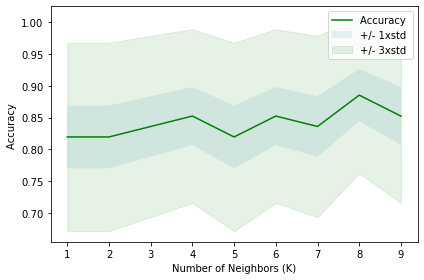

In [12]:
plt.plot(range(1, Ks),mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [13]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax() + 1) 

The best accuracy was with 0.8852459016393442 with k = 8


In [14]:
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=8)
k_nearest_neighbors.fit(X_train, y_train)
k_nearest_neighbors

KNeighborsClassifier(n_neighbors=8)

In [15]:
print('Accuracy Score:', accuracy_score(y_test, k_nearest_neighbors.predict(X_test)))
print('F1 Score:', f1_score(y_test, k_nearest_neighbors.predict(X_test)))

Accuracy Score: 0.8852459016393442
F1 Score: 0.8955223880597014


### Support Vector Machine and Kernel Support Vector Machine

Support Vector Machine

In [16]:
from sklearn.svm import SVC
support_vector_machine = SVC(kernel='linear', random_state=0)
support_vector_machine.fit(X_train, y_train)
support_vector_machine

SVC(kernel='linear', random_state=0)

In [17]:
print('Accuracy Score:', accuracy_score(y_test, support_vector_machine.predict(X_test)))
print('F1 Score:', f1_score(y_test, support_vector_machine.predict(X_test)))

Accuracy Score: 0.819672131147541
F1 Score: 0.8450704225352113


Kernel Support Vector Machine

In [18]:
kernel_support_vector_machine = SVC(kernel='linear', random_state=0)
kernel_support_vector_machine.fit(X_train, y_train)
kernel_support_vector_machine

SVC(kernel='linear', random_state=0)

In [19]:
print('Accuracy Score:', accuracy_score(y_test, kernel_support_vector_machine.predict(X_test)))
print('F1 Score:', f1_score(y_test, kernel_support_vector_machine.predict(X_test)))

Accuracy Score: 0.819672131147541
F1 Score: 0.8450704225352113


### Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
decision_tree.fit(X_train, y_train)
decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
print('Accuracy Score:', accuracy_score(y_test, decision_tree.predict(X_test)))
print('F1 Score:', f1_score(y_test, decision_tree.predict(X_test)))

Accuracy Score: 0.7540983606557377
F1 Score: 0.7619047619047619


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
random_forest.fit(X_train, y_train)
random_forest

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [23]:
print('Accuracy Score:', accuracy_score(y_test, random_forest.predict(X_test)))
print('F1 Score:', f1_score(y_test, random_forest.predict(X_test)))

Accuracy Score: 0.8524590163934426
F1 Score: 0.8656716417910447


### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes

GaussianNB()

In [25]:
print('Accuracy Score:', accuracy_score(y_test, naive_bayes.predict(X_test)))
print('F1 Score:', f1_score(y_test, naive_bayes.predict(X_test)))

Accuracy Score: 0.8524590163934426
F1 Score: 0.8732394366197184


### Comparing models

| Algorithms                    | Accuracy Score | F1 Score | Log Loss |
| ----------------------------- | -------------- | -------- | -------- |
| Logistic Regression           | 0.85           | 0.87     | 0.39     |
| k-Nearest Neighbors           | 0.89           | 0.90     | NA       |
| Support Vector Machine        | 0.82           | 0.85     | NA       |
| Kernel Support Vector Machine | 0.82           | 0.85     | NA       |
| Decision Tree                 | 0.75           | 0.76     | NA       |
| Random Forest                 | 0.85           | 0.87     | NA       |
| Naive Bayes                   | 0.85           | 0.87     | NA       |

In [26]:
model = k_nearest_neighbors
model

KNeighborsClassifier(n_neighbors=8)